In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import pearsonr, normaltest,norm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf as acf

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('salary.csv')

In [3]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
YearsExperience    35 non-null float64
Salary             35 non-null int64
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [6]:
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

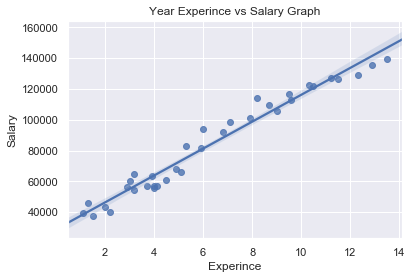

In [7]:
sns.set(style='darkgrid')
sns.regplot(df['YearsExperience'],df['Salary'])
plt.title('Year Experince vs Salary Graph')
plt.xlabel('Experince')
plt.ylabel('Salary')
plt.savefig('Year Experince vs Salary Graph')
plt.show()

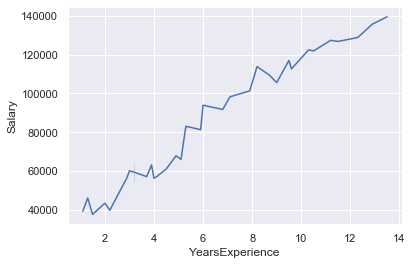

In [8]:
sns.lineplot(df["YearsExperience"] ,df["Salary"])

In [9]:
pearsonr(df['YearsExperience'],df['Salary'])

(0.9824272546479685, 1.2309905889925609e-25)

In [10]:
normaltest(df['Salary'])

NormaltestResult(statistic=14.205479321391296, pvalue=0.0008228475094237983)

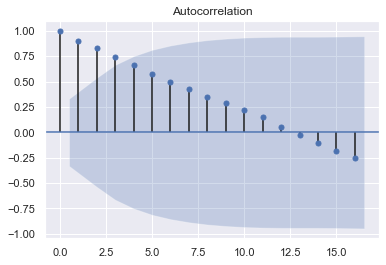

In [11]:
acf(df['Salary'])
plt.show()

In [12]:
x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

In [13]:
def LinearRegression(x, y, m_current =0, b_current =0,epochs =1000,learning_rate =0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * x) + b_current
        m_gradient = -(2/N) * sum(x * (y - y_current))
        b_gradient = -(2/N) * sum( y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current

In [14]:
m,b = LinearRegression(x, y)

In [15]:
def y_predict(x , m, b):
    return m * x + b

In [17]:
years = int(input("Enter Number Of Years For Predicted Salary:\n"))
y_predict(years,m,b)

Enter Number Of Years For Predicted Salary:
9


array([109692.41321619])